Rows and Columns of the dataset: (545, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       545 non-null    int64
 1   bedrooms   545 non-null    int64
 2   bathrooms  545 non-null    int64
 3   price      545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB
None
               area    bedrooms   bathrooms         price
count    545.000000  545.000000  545.000000  5.450000e+02
mean    5150.541284    2.965138    1.286239  4.766729e+06
std     2170.141023    0.738064    0.502470  1.870440e+06
min     1650.000000    1.000000    1.000000  1.750000e+06
25%     3600.000000    2.000000    1.000000  3.430000e+06
50%     4600.000000    3.000000    1.000000  4.340000e+06
75%     6360.000000    3.000000    2.000000  5.740000e+06
max    16200.000000    6.000000    4.000000  1.330000e+07
Training R-squared: 0.505
Testing R-squared: 0.445
R-squared

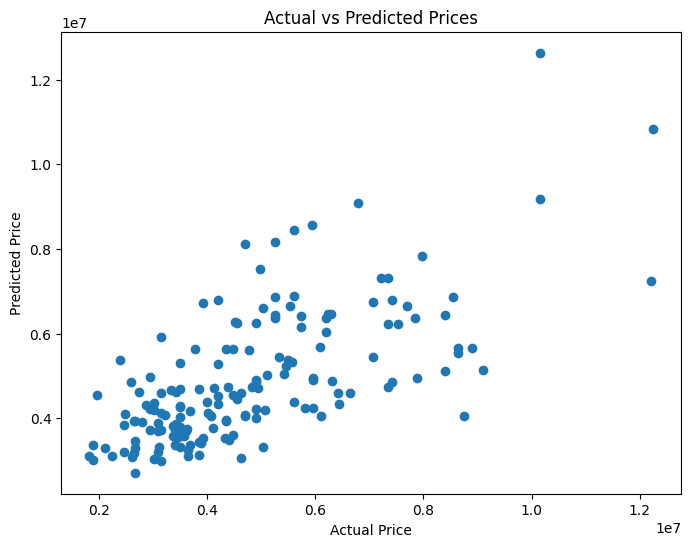

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('/content/Housing.csv')

# Selecting only 'area', 'bedrooms', 'bathrooms', and 'price' columns
data = data[['area', 'bedrooms', 'bathrooms', 'price']]

# Initial exploration
print("Rows and Columns of the dataset:", data.shape)
print(data.info())
print(data.describe())

# Split into features (X) and label (y)
X = data.drop('price', axis=1)
y = data['price']

# Split into train and test sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scale numerical features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

# Evaluate model
train_score = linear_regression.score(X_train_scaled, y_train)
test_score = linear_regression.score(X_test_scaled, y_test)
print(f"Training R-squared: {train_score:.3f}")
print(f"Testing R-squared: {test_score:.3f}")

# Predictions
predictions = linear_regression.predict(X_test_scaled)
r2 = r2_score(y_test, predictions)
print(f"R-squared on test set: {r2:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

